### MC star experiment step by step

Starting from a star graph apply the greedy heuristic. Store the topologies and plot the progress in regular steps.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import sys

%load_ext autoreload
%autoreload 2

sys.path.append('../src/')

from greedy_topology_optimization import monte_carlo_step
from utils import generate_random_bot_problem
from iterative_geometry_solver import iterative_geometry_solver

In [2]:
seed=138
np.random.seed(seed)
num_terminals = 100

cost_arr = np.array([])
topo_dict = {}

num_sources = np.random.randint(1, num_terminals)
num_sinks = num_terminals - num_sources
bot_problem_dict = generate_random_bot_problem(num_sources, num_sinks, normalised_to=1, dim=2,
                                                       max_length=1.)

al = bot_problem_dict["al"]
coords_sources = bot_problem_dict["coords_sources"]
coords_sinks = bot_problem_dict["coords_sinks"]
supply_arr = bot_problem_dict["supply_arr"]
demand_arr = bot_problem_dict["demand_arr"]

# init star graph:
topo = nx.Graph()
for node in range(len(supply_arr) + len(demand_arr)):
    topo.add_edge(-1, node)
    
topo_dict[0] = topo.copy()

cost, coords_iter = iterative_geometry_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                         relative_improvement_threshold=1e-6, min_iterations=-1,
                                         max_iterations=1000,
                                         plot=False, title="", fov=None, save=False, save_name="img")

cost_arr = np.append(cost_arr, cost)
# MC iterations:
iteration = 0
T=0
sample_edge_list = list(topo.edges())
keep_going = True
while keep_going and iteration < 60000:
    iteration += 1
    topo, sample_edge_list, cost, coords_iter, accepted = monte_carlo_step(topo, sample_edge_list, cost,
                                    coords_iter, bot_problem_dict, temperature=T)
    cost_arr = np.append(cost_arr, cost)
    topo_dict[iteration] = topo.copy()
    
    # check if converged:
    if len(sample_edge_list) == 0:
        # this means that we have stuck with one topology for an entire run through.
        keep_going = False
    
    if iteration % 500 == 0:
        print(f"{iteration} iterations.")
        
# store the results in a pickle file:
results_dict = {"cost_arr":cost_arr, "topo_dict":topo_dict}
pkl_file_path = f"../results/output_files/stepMC_star_seed{seed}.pkl"
output = open(pkl_file_path, 'wb')
pickle.dump(results_dict, output)
output.close()

500 iterations.
1000 iterations.
1500 iterations.


In [3]:
np.random.seed(seed)
num_terminals = 100

num_sources = np.random.randint(1, num_terminals)
num_sinks = num_terminals - num_sources
bot_problem_dict = generate_random_bot_problem(num_sources, num_sinks, normalised_to=1, dim=2,
                                                       max_length=1.)

al = bot_problem_dict["al"]
coords_sources = bot_problem_dict["coords_sources"]
coords_sinks = bot_problem_dict["coords_sinks"]
supply_arr = bot_problem_dict["supply_arr"]
demand_arr = bot_problem_dict["demand_arr"]

In [4]:
pkl_file_path = pkl_file_path = f"../results/output_files/stepMC_star_seed{seed}.pkl"
pkl_file = open(pkl_file_path, 'rb')
results_dict = pickle.load(pkl_file)
pkl_file.close()
cost_arr = results_dict["cost_arr"]
topo_dict = results_dict["topo_dict"]

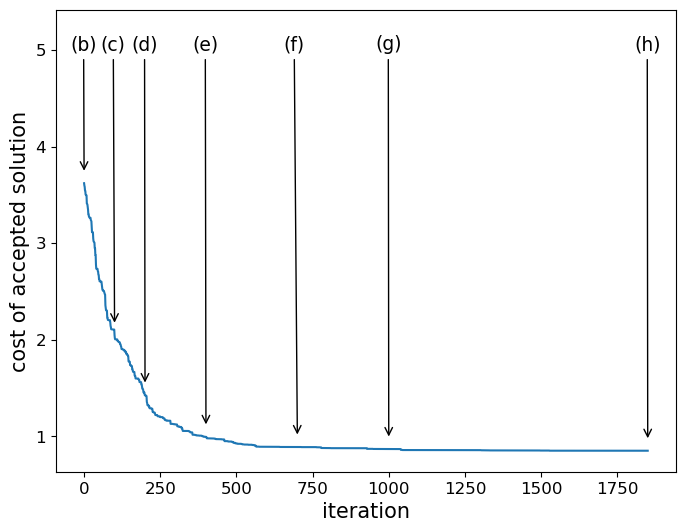

In [5]:
interval = [0,100,200,400,700,1000,len(cost_arr)-1]
l = ["(b)","(c)","(d)","(e)","(f)","(g)","(h)"]

plt.figure(figsize=(8,6))
plt.plot(np.arange(len(cost_arr)), cost_arr)
plt.xlabel("iteration",fontsize = 15)
plt.ylabel("cost of accepted solution",fontsize = 15)
#for i in interval:
#    plt.axvline(i, ymin=cost_arr[i]/5, ymax = 0.8, color="k")
plt.scatter(0,5.2, color="w")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i,_ in enumerate(interval):
    plt.annotate(l[i], xy=(interval[i], cost_arr[interval[i]] + 0.1), xytext=(interval[i]-45, 5), fontsize=13.5, arrowprops=dict(arrowstyle="->"))
#plt.savefig(f"MCcost{seed}.pdf")
plt.show()

iteration: 0


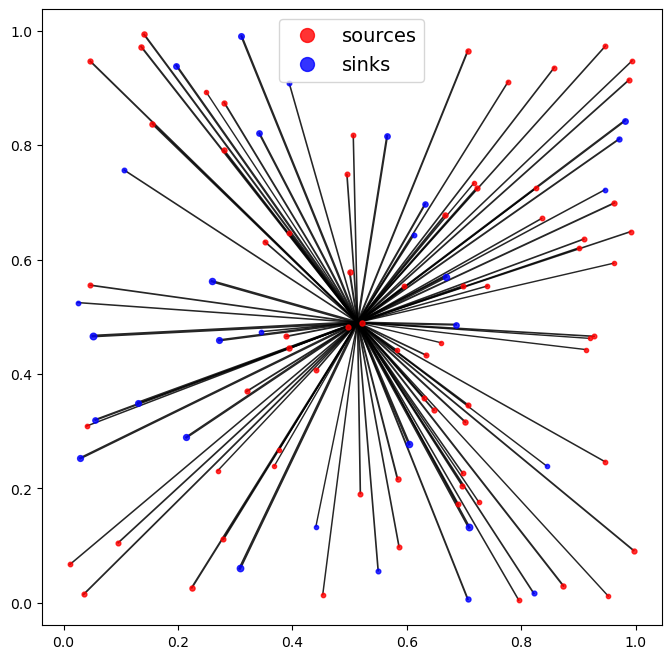

iteration: 10


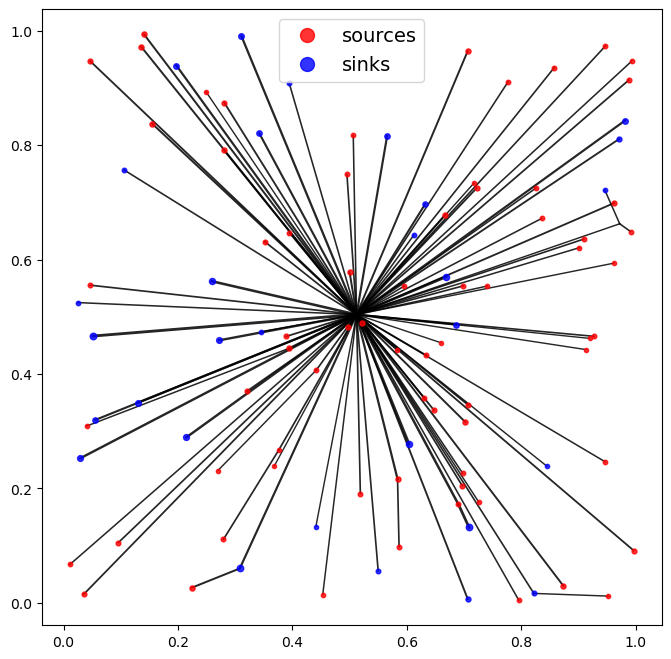

iteration: 20


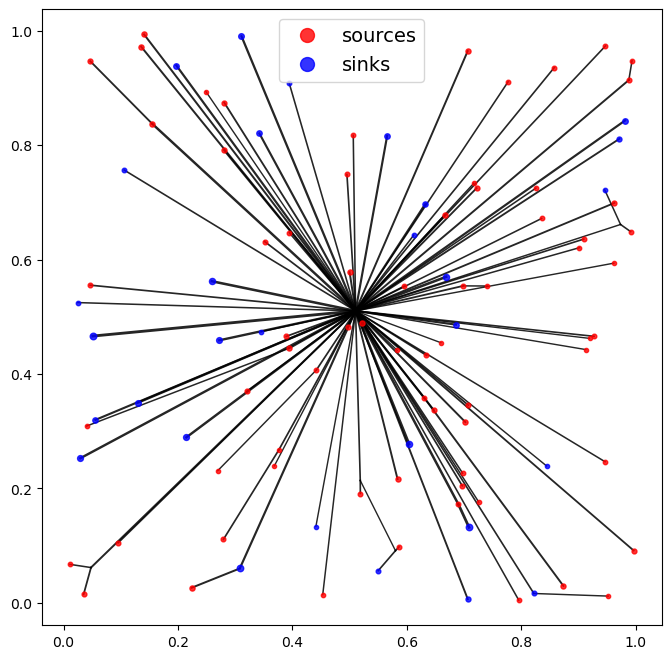

iteration: 30


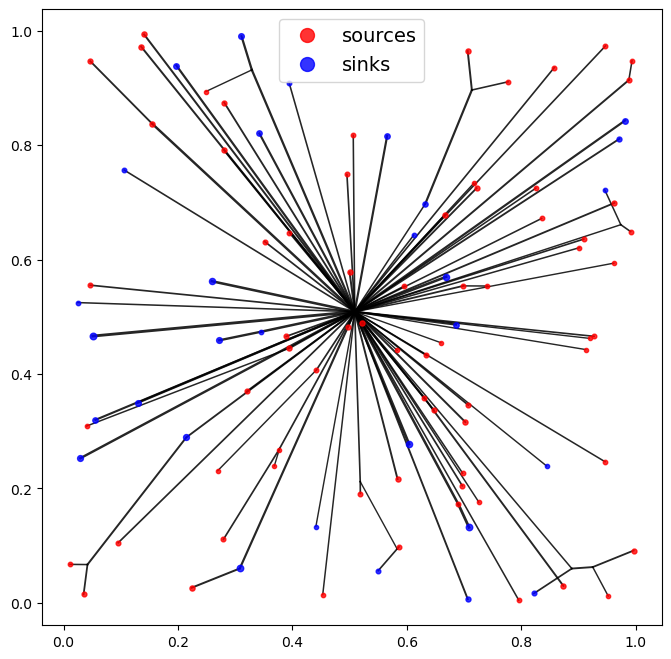

iteration: 40


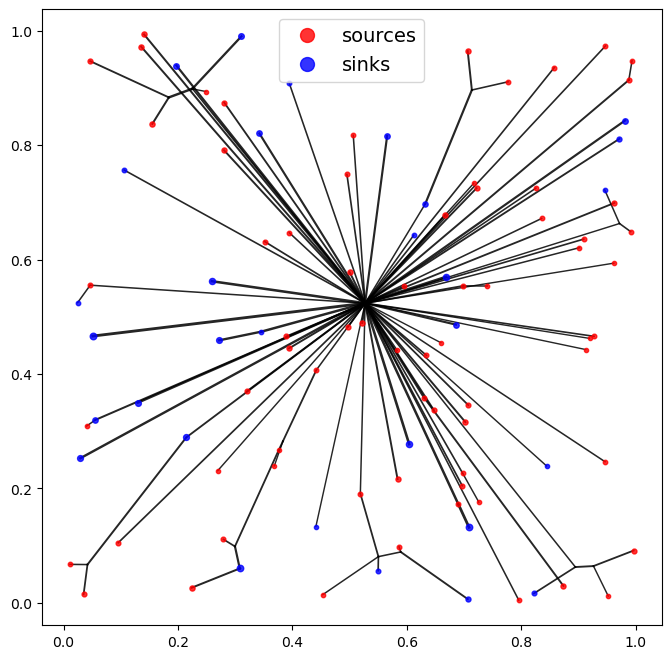

iteration: 50


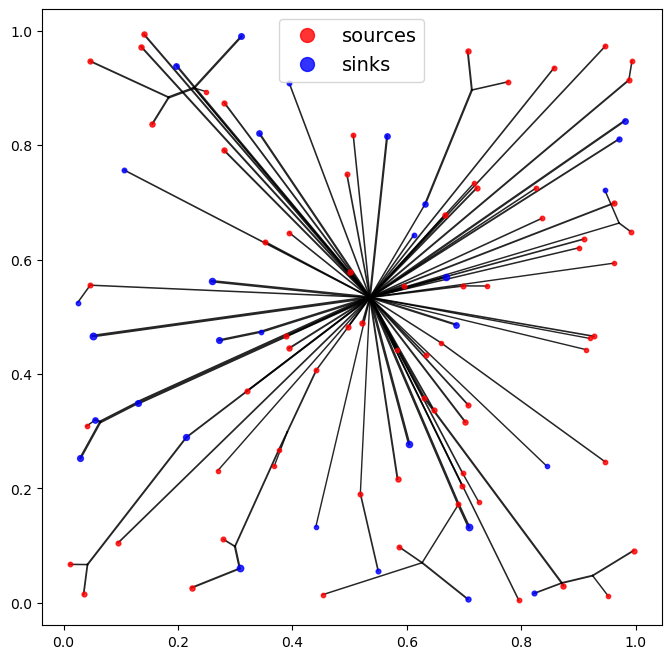

iteration: 60


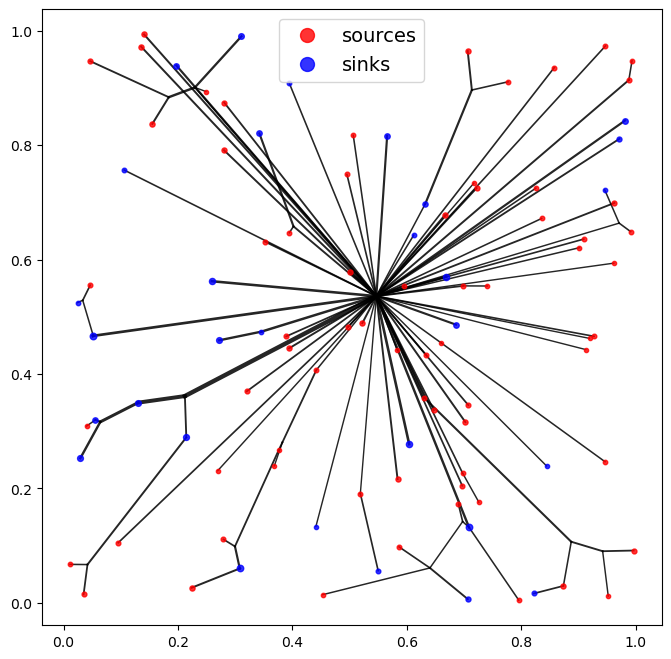

iteration: 70


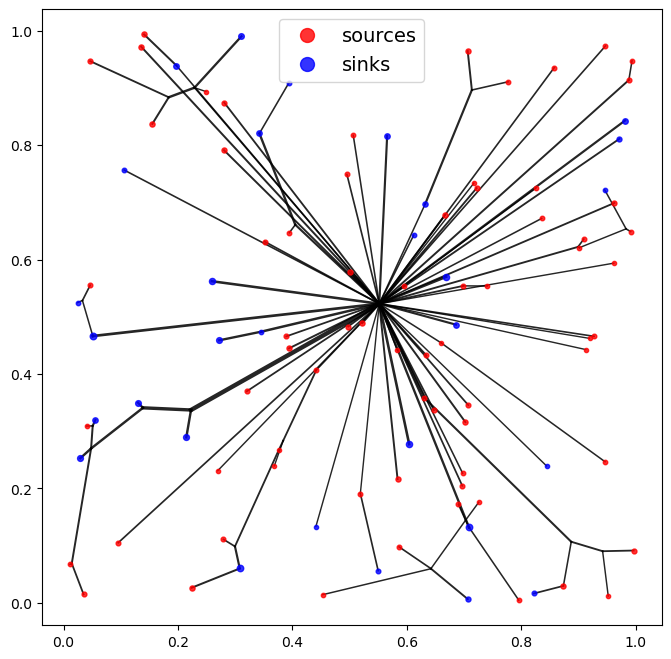

iteration: 80


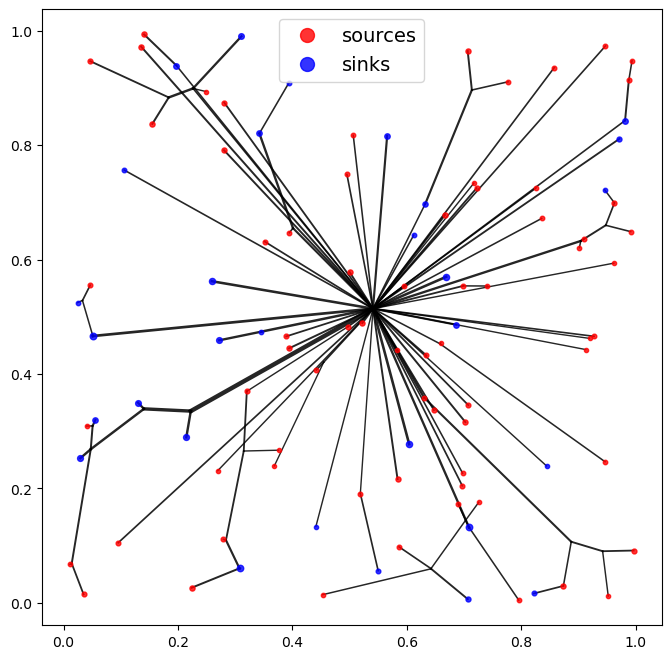

iteration: 90


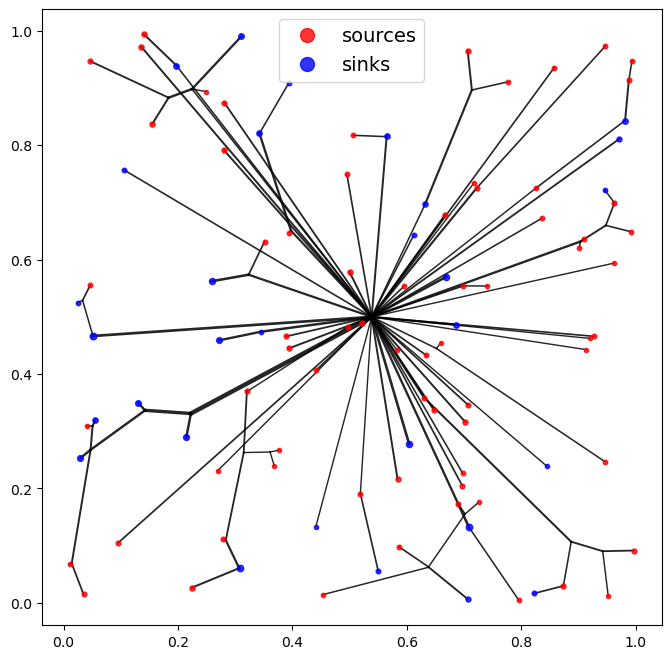

iteration: 100


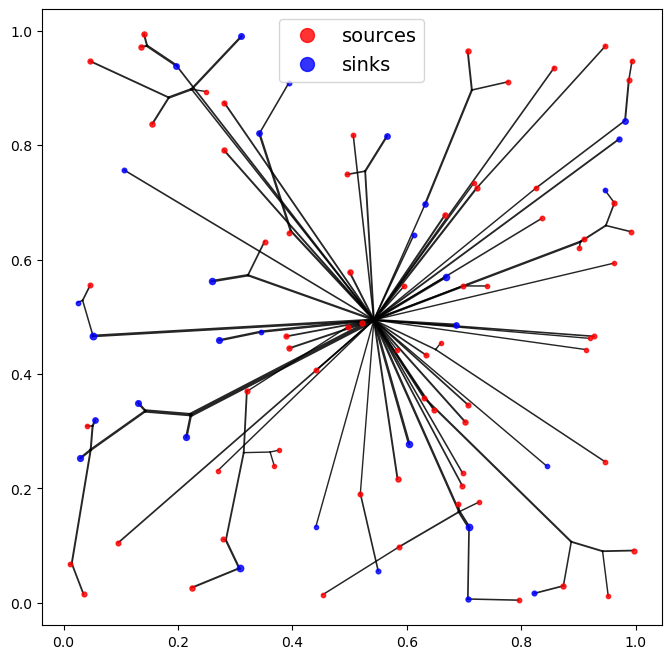

iteration: 150


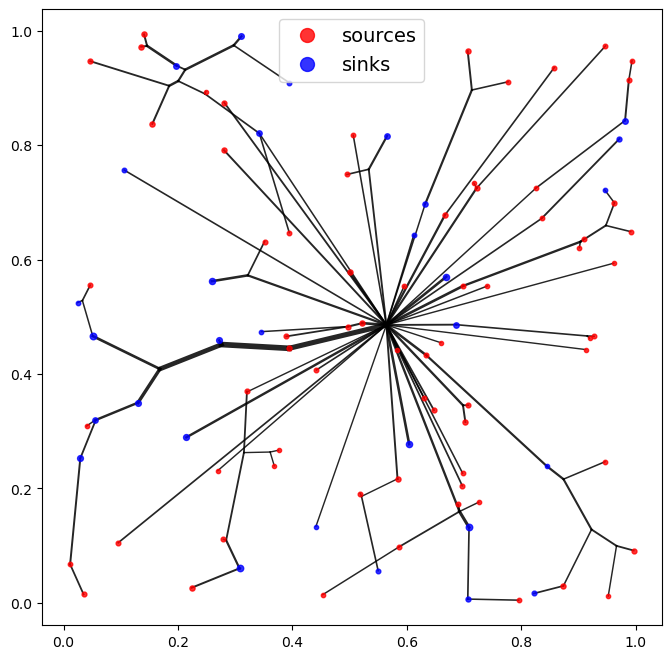

iteration: 200


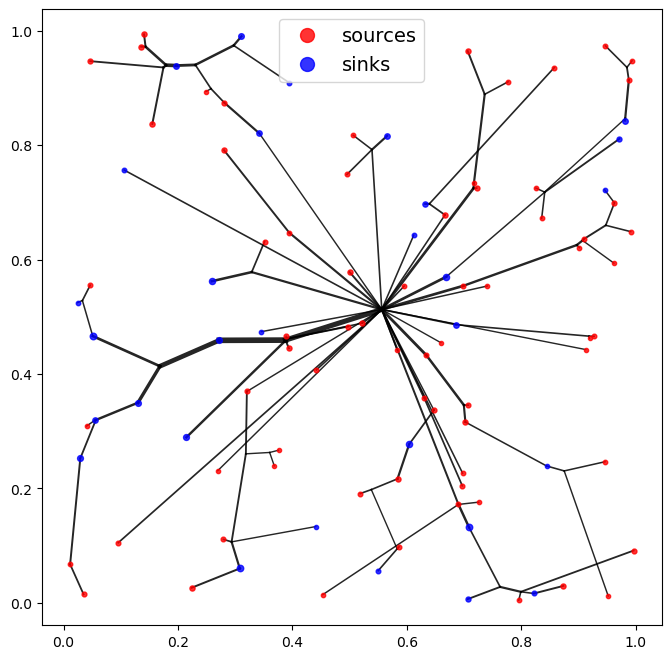

iteration: 300


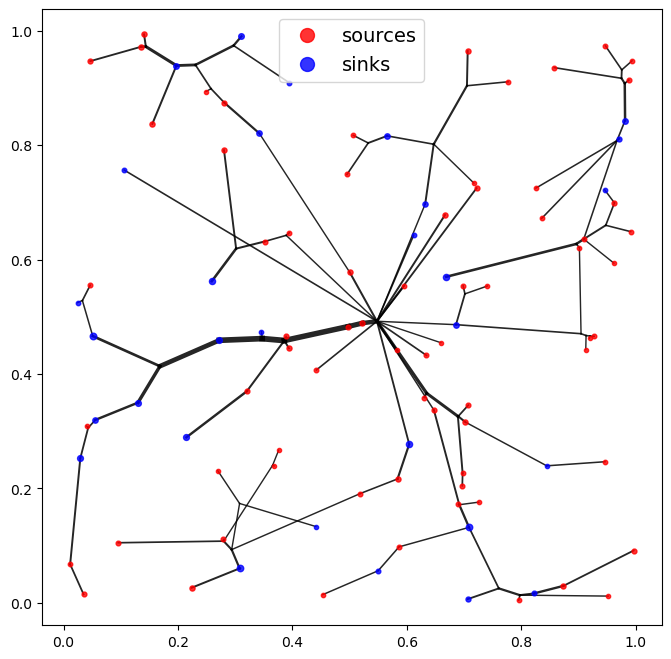

iteration: 400


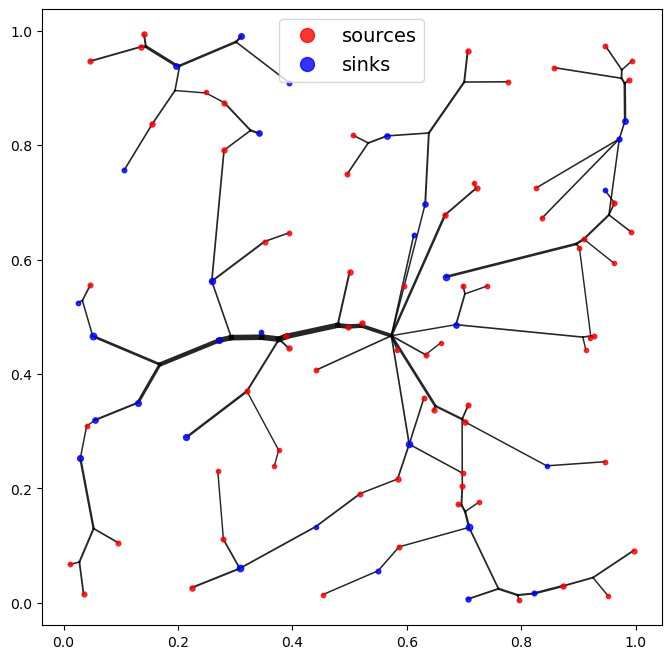

iteration: 500


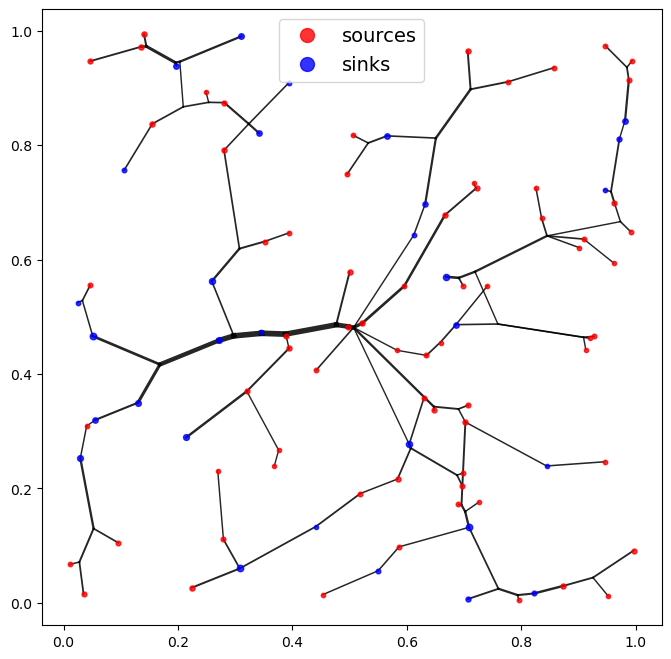

iteration: 600


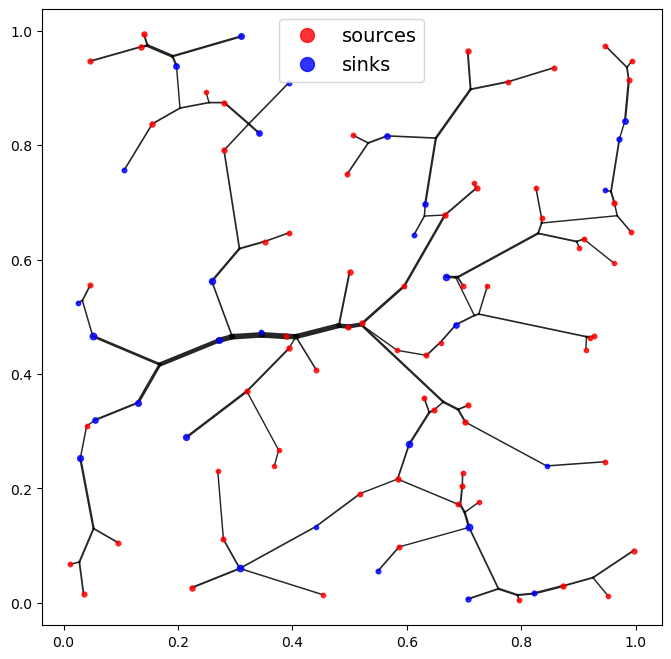

iteration: 700


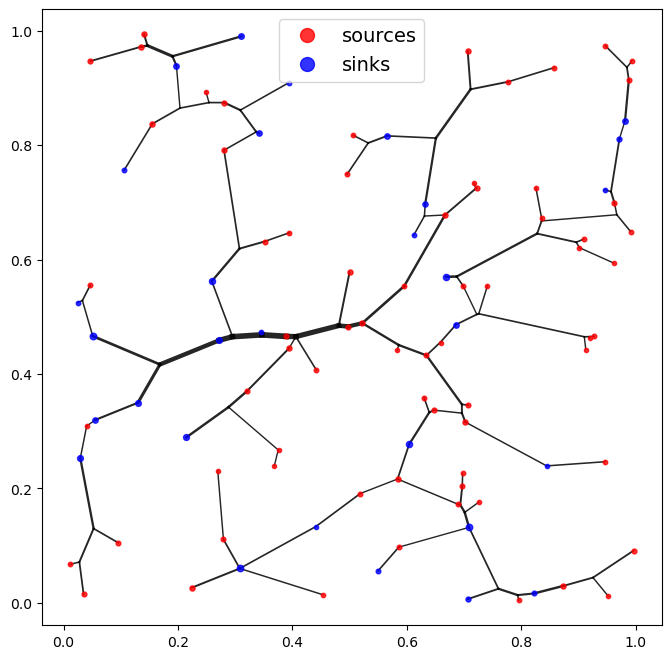

iteration: 1000


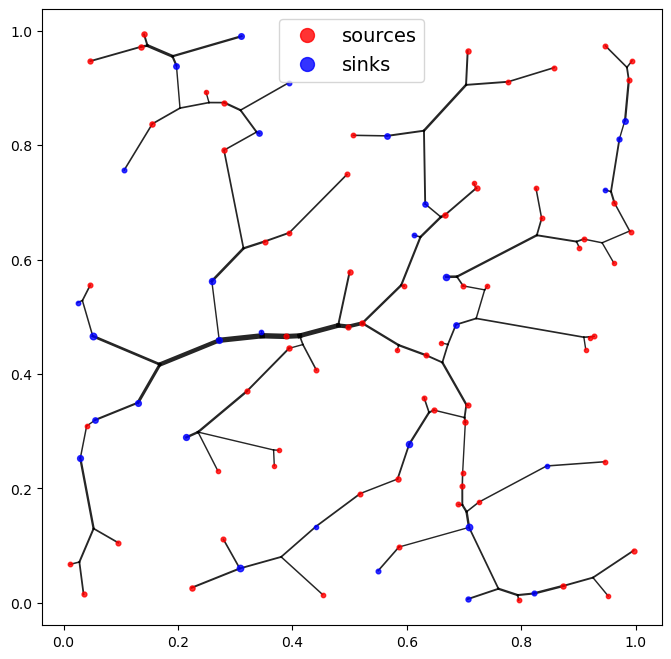

iteration: 1850


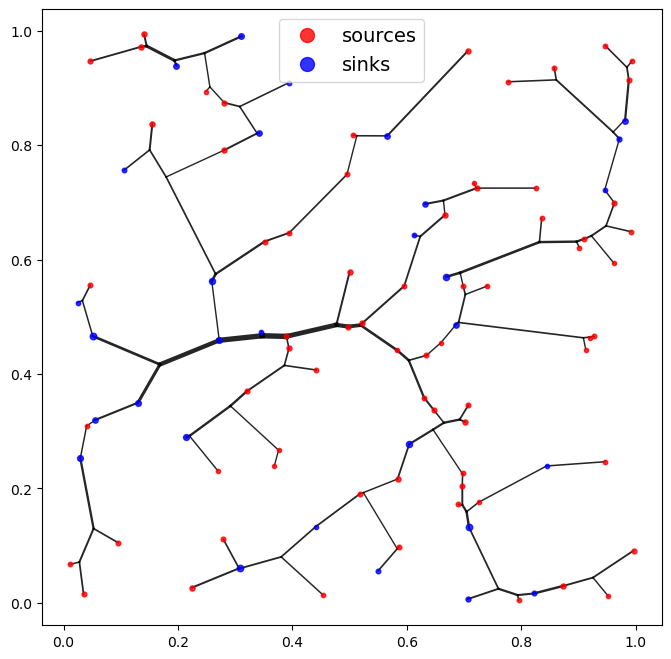

In [6]:
interval = [0,10,20,30,40,50,60,70,80,90,100,150,200,300,400,500,600,700,1000,len(cost_arr)-1]
count = 0
for i,_ in enumerate(topo_dict):
    if i not in interval:
        continue
    print("iteration:", i)
    count +=1
    topo = topo_dict[i]
    
    _ = iterative_geometry_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                         relative_improvement_threshold=1e-6, min_iterations=-1,
                                         max_iterations=1000,
                                         plot=True, title="", fov=None, save=False, save_name=f"img{count}_seed{seed}")